In [1]:
"""

https://www.interviewqs.com/blog/py_stock_correlation

"""

j
a
m
e
s


In [ ]:
# Import libraries, select our list of stocks to correlate

In [1]:
# Import libraries, select our list of stocks to correlate

import numpy as np
import pandas as pd
#used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
#to visualize the results
import matplotlib.pyplot as plt
import seaborn
 
#select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list = ['AAPL', 'F', 'TWTR', 'FB', 'AAL', 'AMZN', 'GOOGL', 'GE']
print(start)
print(symbols_list)

ModuleNotFoundError: No module named 'pandas_datareader'

In [7]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2017-01-03,116.150002,AAPL
1,2017-01-04,116.019997,AAPL
2,2017-01-05,116.610001,AAPL
3,2017-01-06,117.910004,AAPL
4,2017-01-09,118.989998,AAPL


In [8]:
df.tail()


,Date,Close,Symbol
5611,2019-10-10,8.45,GE
5612,2019-10-11,8.80,GE
5613,2019-10-14,8.72,GE
5614,2019-10-15,8.89,GE
5615,2019-10-16,8.90,GE


In [9]:
# ensure that the column's first letter is capitalised!
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AAL,AAPL,AMZN,F,FB,GE,GOOGL,TWTR
0,2017-01-03,46.299999,116.150002,753.669983,12.59,116.860001,30.471153,808.010010,16.440001
1,2017-01-04,46.700001,116.019997,757.179993,13.17,118.690002,30.480770,807.770020,16.860001
2,2017-01-05,45.889999,116.610001,780.450012,12.77,120.669998,30.307692,813.020020,17.090000
3,2017-01-06,46.209999,117.910004,795.989990,12.76,123.410004,30.394230,825.210022,17.170000
4,2017-01-09,47.080002,118.989998,796.919983,12.63,124.900002,30.250000,827.179993,17.500000


In [10]:
 corr_df = df_pivot.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
 corr_df.head().reset_index()
 del corr_df.index.name
 corr_df.head(10)

Symbol,AAL,AAPL,AMZN,F,FB,GE,GOOGL,TWTR
AAL,1.000000,-0.576988,-0.677246,0.778042,-0.147868,0.648398,-0.505932,-0.653750
AAPL,-0.576988,1.000000,0.868176,-0.567437,0.604704,-0.764870,0.867741,0.764596
AMZN,-0.677246,0.868176,1.000000,-0.706495,0.548172,-0.915276,0.900196,0.903861
F,0.778042,-0.567437,-0.706495,1.000000,-0.035898,0.742217,-0.588893,-0.580247
FB,-0.147868,0.604704,0.548172,-0.035898,1.000000,-0.458867,0.692650,0.610361
GE,0.648398,-0.764870,-0.915276,0.742217,-0.458867,1.000000,-0.843717,-0.866480
GOOGL,-0.505932,0.867741,0.900196,-0.588893,0.692650,-0.843717,1.000000,0.838882
TWTR,-0.653750,0.764596,0.903861,-0.580247,0.610361,-0.866480,0.838882,1.000000


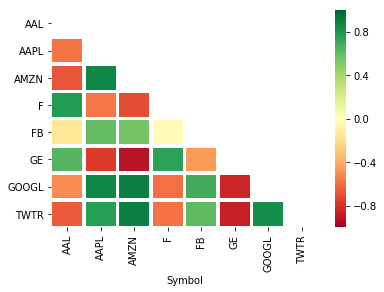

In [11]:
 #take the bottom triangle since it repeats itself
 mask = np.zeros_like(corr_df)
 mask[np.triu_indices_from(mask)] = True
 #generate plot
 seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 plt.yticks(rotation=0) 
 plt.xticks(rotation=90) 
 plt.show()